Install the required packages

In [1]:
!pip install umap-learn

     |████████████████████████████████| 88 kB 2.5 MB/s 
     |████████████████████████████████| 1.1 MB 42.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=86164b59e6ebcb1b4b91ae0a9aa794f5ade7bfedbda275251cbdc2e1442d7376
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=bc58e89ef292240d4fcdc42f1ddbcca4f242ebb7aaac427a438b37a011cc1fcf
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [2]:
!pip install umap-learn[plot]

     |████████████████████████████████| 18.2 MB 1.2 MB/s 
     |████████████████████████████████| 76 kB 3.5 MB/s 
     |████████████████████████████████| 136 kB 35.2 MB/s 
     |████████████████████████████████| 837 kB 38.8 MB/s 
     |████████████████████████████████| 830 kB 41.7 MB/s 
     |████████████████████████████████| 822 kB 35.7 MB/s 
     |████████████████████████████████| 802 kB 35.9 MB/s 
     |████████████████████████████████| 802 kB 45.6 MB/s 
     |████████████████████████████████| 793 kB 25.1 MB/s 
     |████████████████████████████████| 793 kB 40.0 MB/s 
     |████████████████████████████████| 791 kB 45.8 MB/s 
     |████████████████████████████████| 786 kB 42.1 MB/s 
     |████████████████████████████████| 779 kB 36.8 MB/s 
     |████████████████████████████████| 778 kB 42.5 MB/s 
     |████████████████████████████████| 776 kB 43.4 MB/s 
     |████████████████████████████████| 769 kB 46.3 MB/s 
     |████████████████████████████████| 766 kB 42.5 MB/s 
     |██████████

In [3]:
pip install -q vaderSentiment

     |████████████████████████████████| 125 kB 5.4 MB/s 


Import the required libraries

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import umap
import umap.plot

from sklearn import metrics
from collections import Counter

In [5]:
import tensorflow as tf
import tensorflow_hub as hub

Load the preprocessed dataset

In [6]:
df = pd.read_csv('../data/preprocessed-data.csv')

In [7]:
df.head()

label                                               text
0          rec.sport.hockey  pens fans pretty confused lack kind posts rece...
1  comp.sys.ibm.pc.hardware  brother market high performance video card sup...
2     talk.politics.mideast  finally dream mediterranean area greater holoc...
3  comp.sys.ibm.pc.hardware  scsi card doing dma transfers disks scsi card ...
4     comp.sys.mac.hardware  [number] old drive cannot understanding driver...

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   18270 non-null  object
 1   text    18270 non-null  object
dtypes: object(2)
memory usage: 285.6+ KB


Use Vader to perform Sentiment Analysis on the data

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [10]:
vader_analyzer = SentimentIntensityAnalyzer()

In [11]:
def text_sentiment_vader(text):
  vs = vader_analyzer.polarity_scores(text)
  return int(vs.get("compound")>0)

In [12]:
predictions = df.iloc[:10,:].text.map(lambda x : text_sentiment_vader(x))
predictions

0    0
1    1
2    0
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: text, dtype: int64

In [13]:
df["sentiment_vader"] = df.text.map(lambda x : text_sentiment_vader(x))

In [14]:
from collections import Counter
Counter(df["sentiment_vader"].values)

Counter({0: 6627, 1: 11643})

In [15]:
df.head()

label  \
0          rec.sport.hockey   
1  comp.sys.ibm.pc.hardware   
2     talk.politics.mideast   
3  comp.sys.ibm.pc.hardware   
4     comp.sys.mac.hardware   

                                                text  sentiment_vader  
0  pens fans pretty confused lack kind posts rece...                0  
1  brother market high performance video card sup...                1  
2  finally dream mediterranean area greater holoc...                0  
3  scsi card doing dma transfers disks scsi card ...                1  
4  [number] old drive cannot understanding driver...                1

Save the data with the sentiment label to a CSV file

In [16]:
df.to_csv("../data/preprocessed-data-with-sentiment.csv", index=None)

Load the Google Sentence Encoder

In [17]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [18]:
def embed(input):
  return model([input]).numpy()

Generate Sentence Embeddings for each text

In [19]:
df['sentence_embedding'] = df['text'].apply(embed)

In [20]:
df.head()

label  \
0          rec.sport.hockey   
1  comp.sys.ibm.pc.hardware   
2     talk.politics.mideast   
3  comp.sys.ibm.pc.hardware   
4     comp.sys.mac.hardware   

                                                text  sentiment_vader  \
0  pens fans pretty confused lack kind posts rece...                0   
1  brother market high performance video card sup...                1   
2  finally dream mediterranean area greater holoc...                0   
3  scsi card doing dma transfers disks scsi card ...                1   
4  [number] old drive cannot understanding driver...                1   

                                  sentence_embedding  
0  [[-0.039444264, -0.06200563, -0.04417411, -0.0...  
1  [[-0.039467372, -0.06284555, -0.023931732, -0....  
2  [[-0.057665747, -0.05788381, 0.016808882, 0.02...  
3  [[0.048537795, -0.04648022, 0.04489063, 0.0434...  
4  [[-0.05286335, -0.0630331, 0.024503058, 0.0362...

In [21]:
df.groupby(['label', 'sentiment_vader'])['sentiment_vader'].describe()[['count']]

count
label                    sentiment_vader       
alt.atheism              0                365.0
                         1                412.0
comp.graphics            0                234.0
                         1                718.0
comp.os.ms-windows.misc  0                227.0
                         1                717.0
comp.sys.ibm.pc.hardware 0                260.0
                         1                702.0
comp.sys.mac.hardware    0                253.0
                         1                674.0
comp.windows.x           0                290.0
                         1                685.0
misc.forsale             0                141.0
                         1                818.0
rec.autos                0                342.0
                         1                592.0
rec.motorcycles          0                430.0
                         1                538.0
rec.sport.baseball       0                299.0
                         1                650.0
rec.sport.hockey         0                331.0
                         1                640.0
sci.crypt                0                327.0
                         1                634.0
sci.electronics          0                282.0
                         1                673.0
sci.med                  0                434.0
                         1                522.0
sci.space                0                310.0
                         1                644.0
soc.religion.christian   0                293.0
                         1                681.0
talk.politics.guns       0                630.0
                         1                255.0
talk.politics.mideast    0                567.0
                         1                348.0
talk.politics.misc       0                373.0
                         1                378.0
talk.religion.misc       0                239.0
                         1                362.0

In [22]:
X = df.iloc[:,3].values
X[0].shape

(1, 512)

In [23]:
X_new = np.array([x for x in X]).reshape((df.shape[0],512))

In [24]:
X_new.shape

(18270, 512)

Use UMAP to generate a 2-D Embedding from the sentence embedding vectors

In [25]:
embedding = umap.UMAP(n_components=2).fit(X_new)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [26]:
embedding.embedding_.shape

(18270, 2)

Visualize the dataset along with the sentiment for each news document

In [27]:
sns.set(style = "darkgrid")

In [28]:
import colorcet as cc
palette = sns.color_palette(cc.glasbey, n_colors=2)

In [29]:
Counter(df["sentiment_vader"].values)

Counter({0: 6627, 1: 11643})

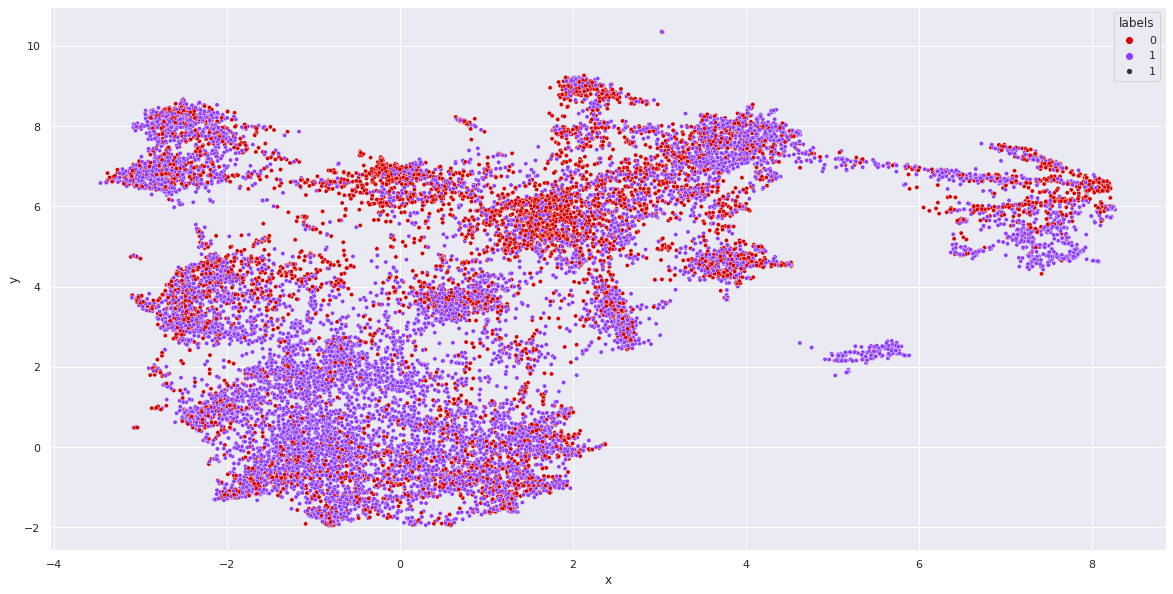

In [30]:
# Prepare data
umap_data = embedding.fit_transform(X_new)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = df["sentiment_vader"].values

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
sns.scatterplot(data=result, x="x", y="y", size=1, hue="labels", palette=palette)

In [31]:
import plotly.express as px

In [32]:
embedding3d = umap.UMAP(n_components=3).fit(X_new)
embedding3d.embedding_.shape

(18270, 3)

In [33]:
proj_3d = embedding3d.fit_transform(X_new)

In [34]:
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.sentiment_vader, labels={'color': 'sentiment_vader'}
)
fig_3d.update_traces(marker_size=2)

fig_3d.show()

Cluster Number: sci.space
954


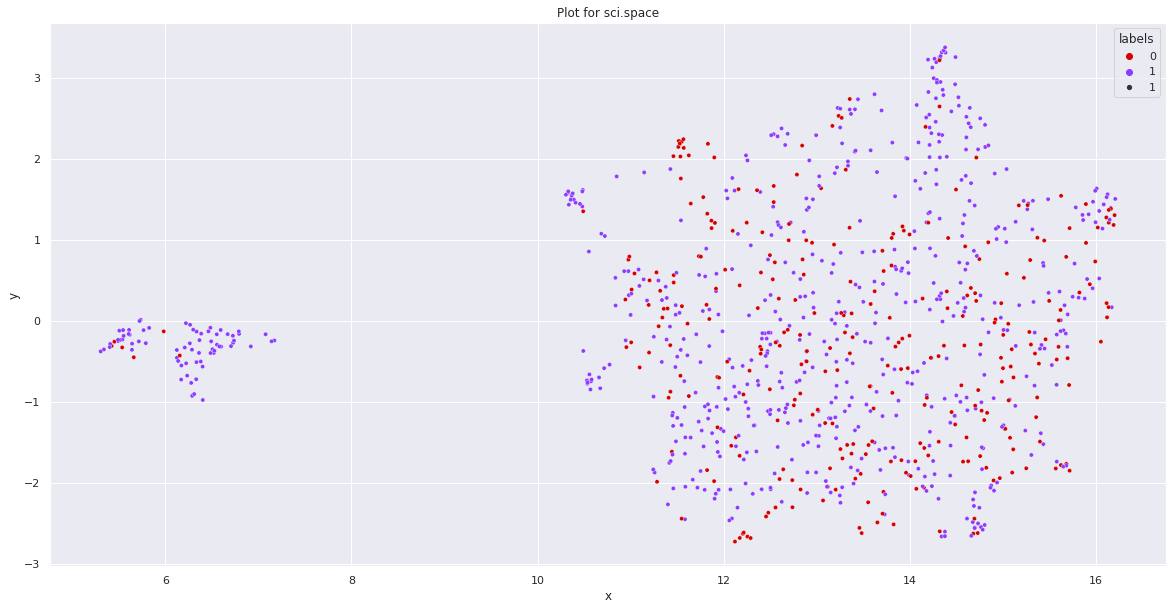

Cluster Number: soc.religion.christian
974


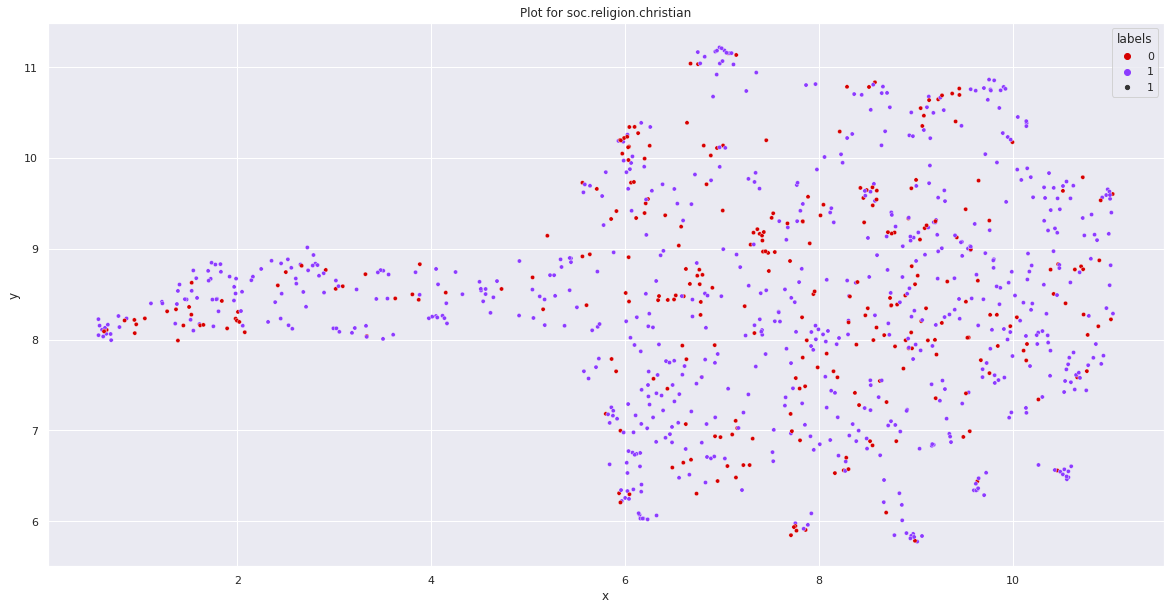

Cluster Number: rec.sport.hockey
971


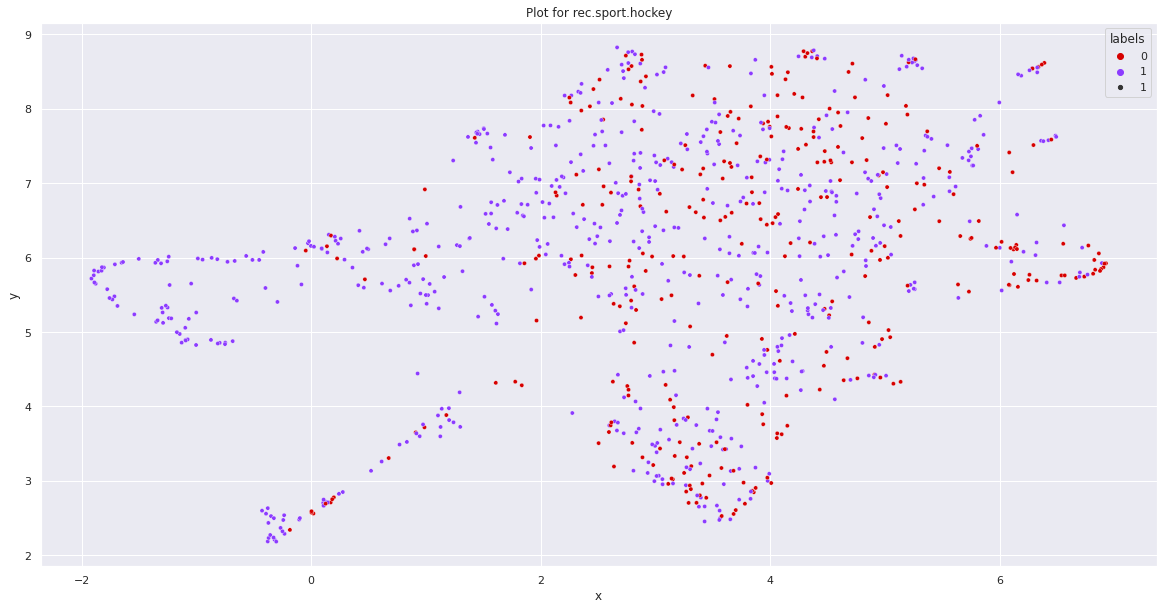

Cluster Number: comp.sys.ibm.pc.hardware
962


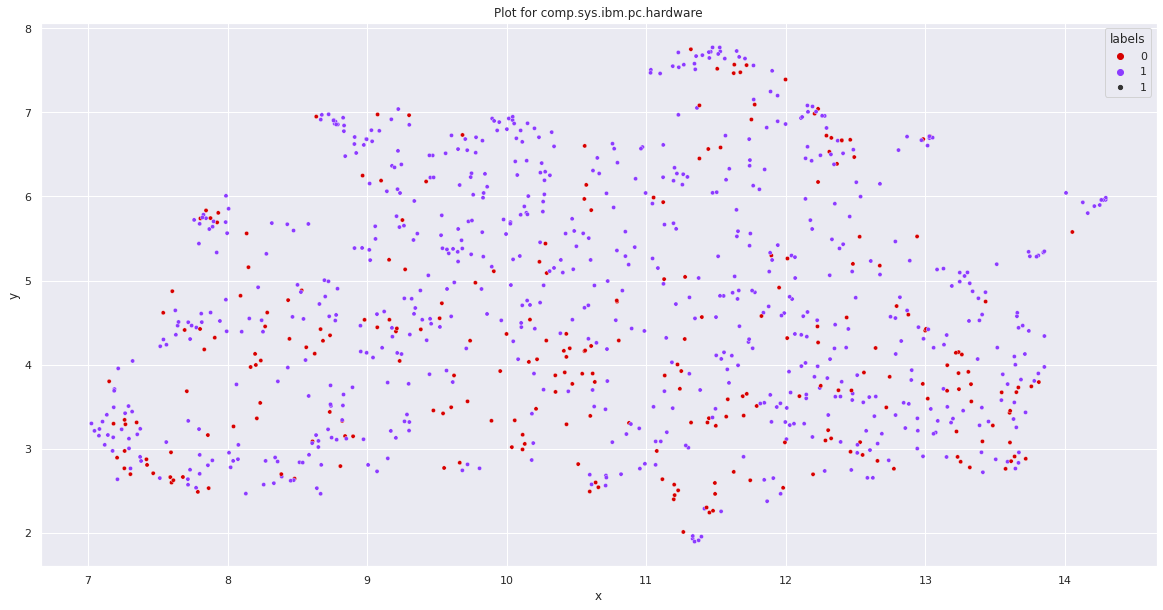

Cluster Number: comp.os.ms-windows.misc
944


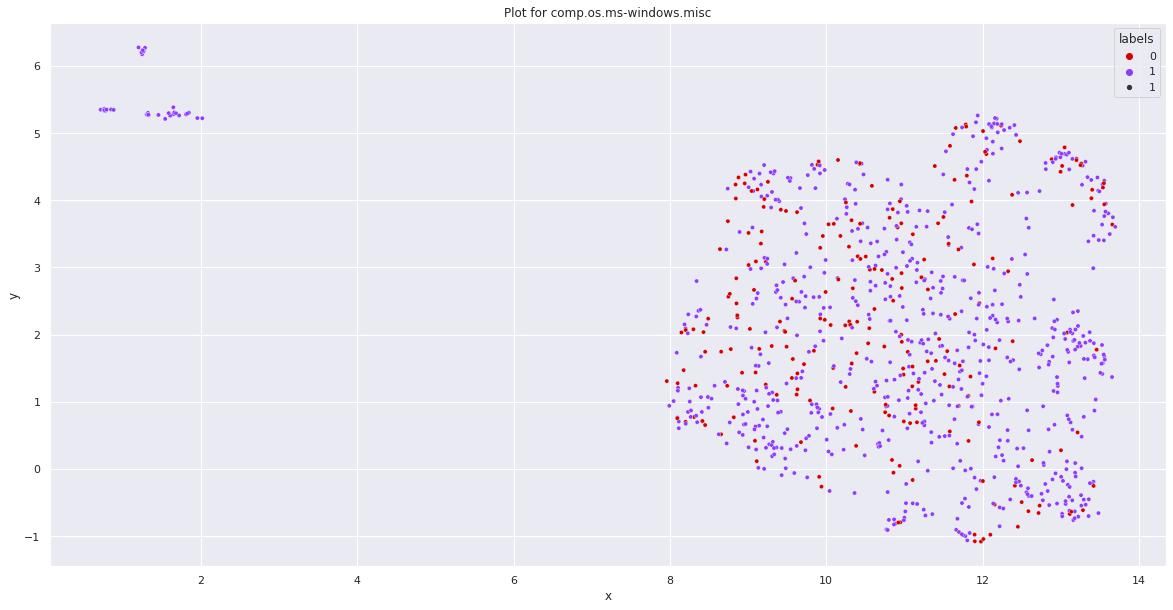

Cluster Number: alt.atheism
777


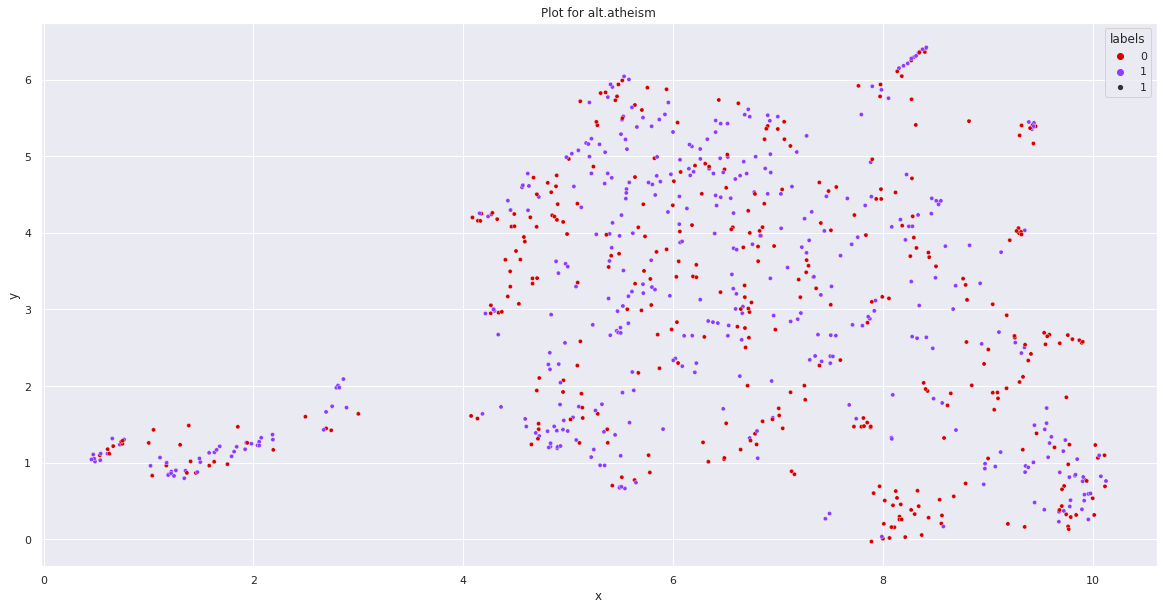

Cluster Number: rec.motorcycles
968


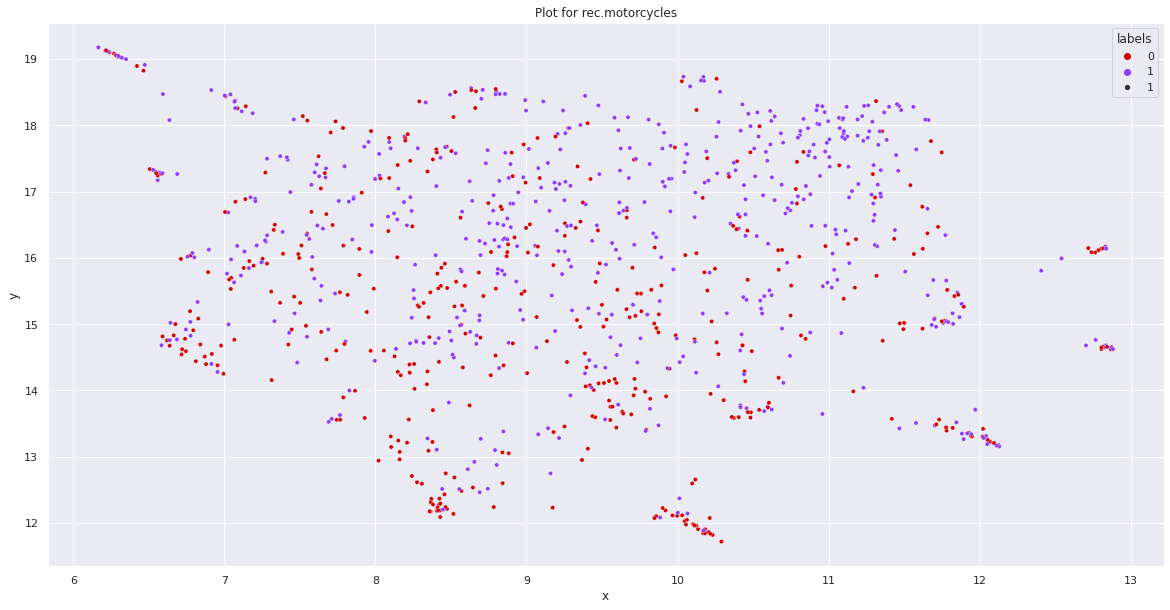

Cluster Number: rec.sport.baseball
949


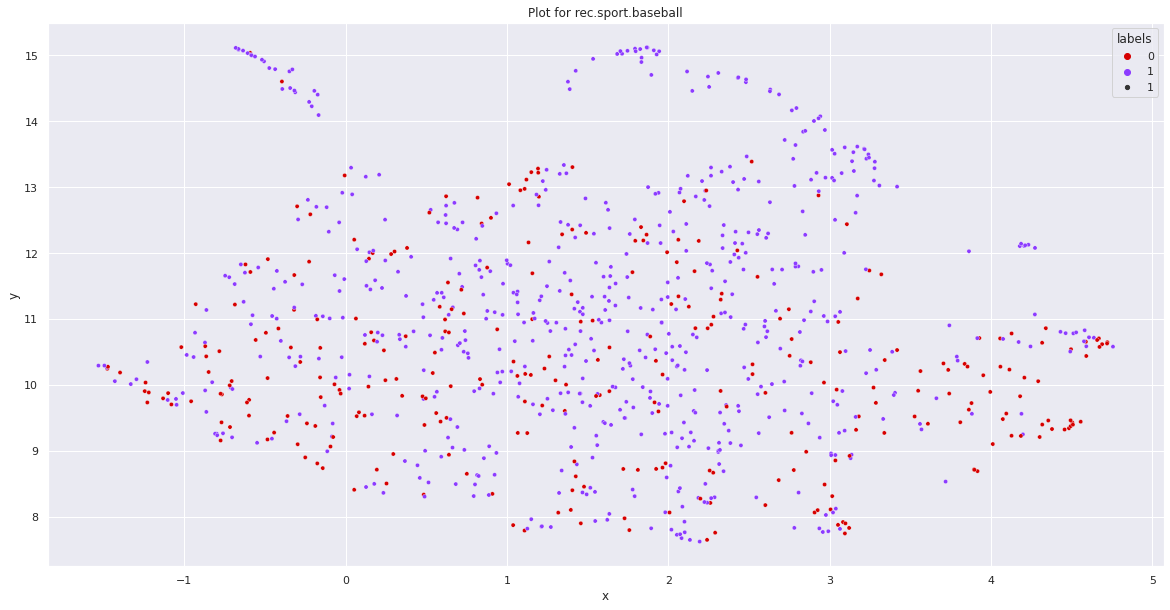

Cluster Number: rec.autos
934


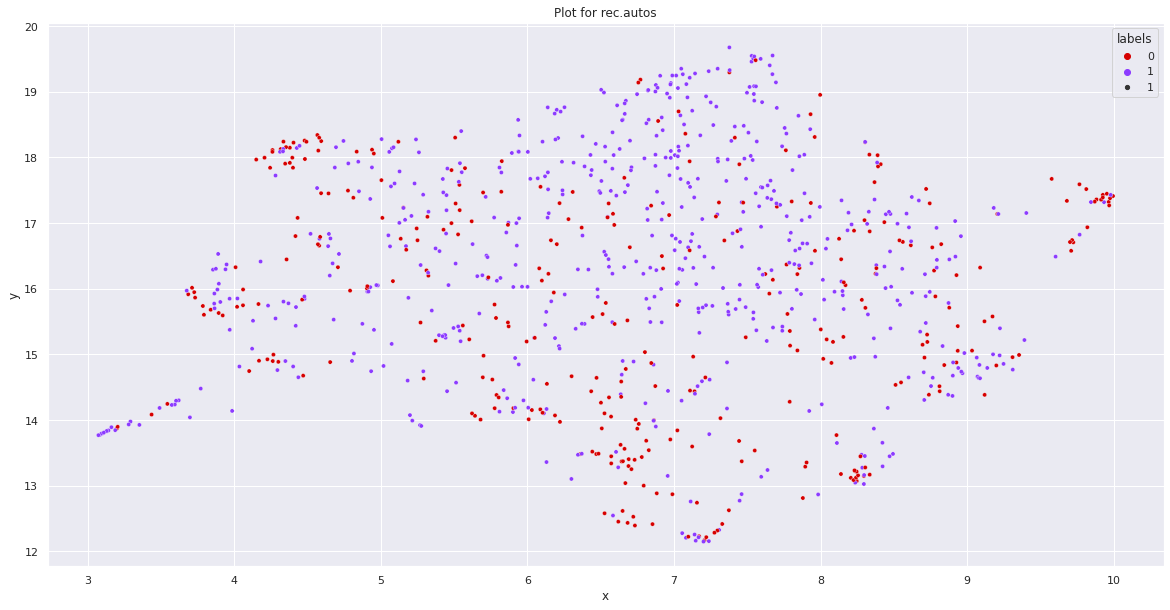

Cluster Number: misc.forsale
959


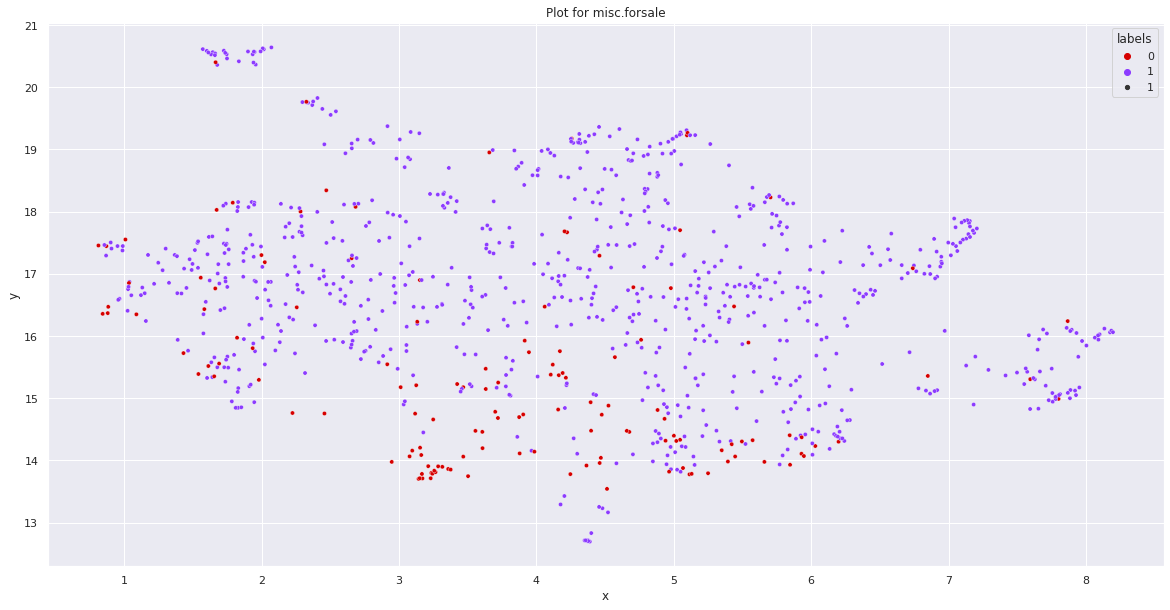

Cluster Number: talk.politics.misc
751


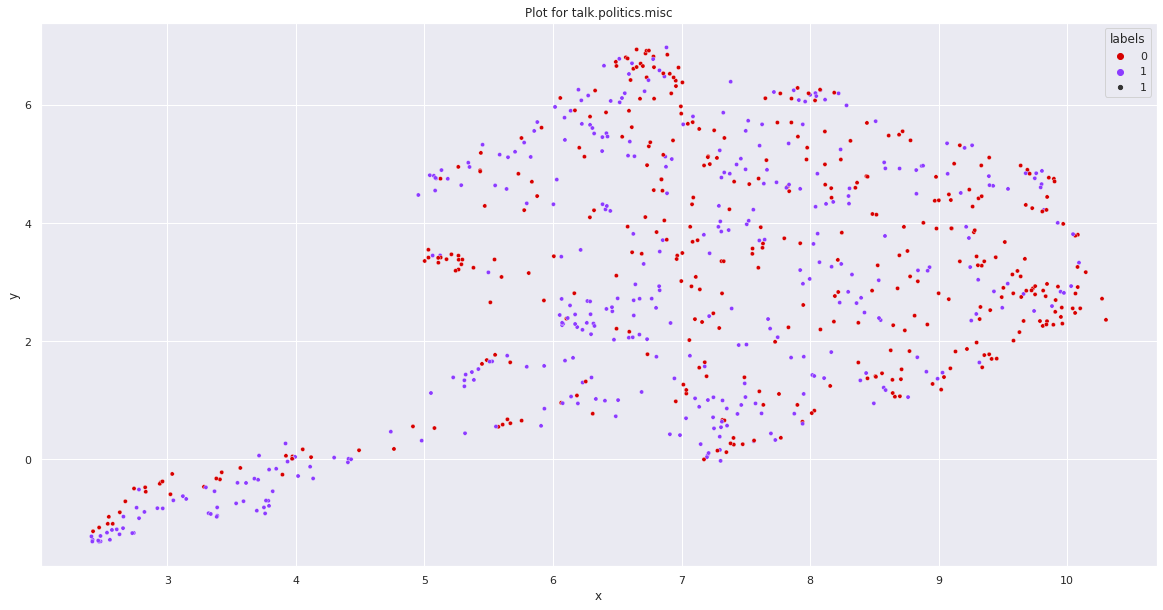

Cluster Number: talk.politics.mideast
915


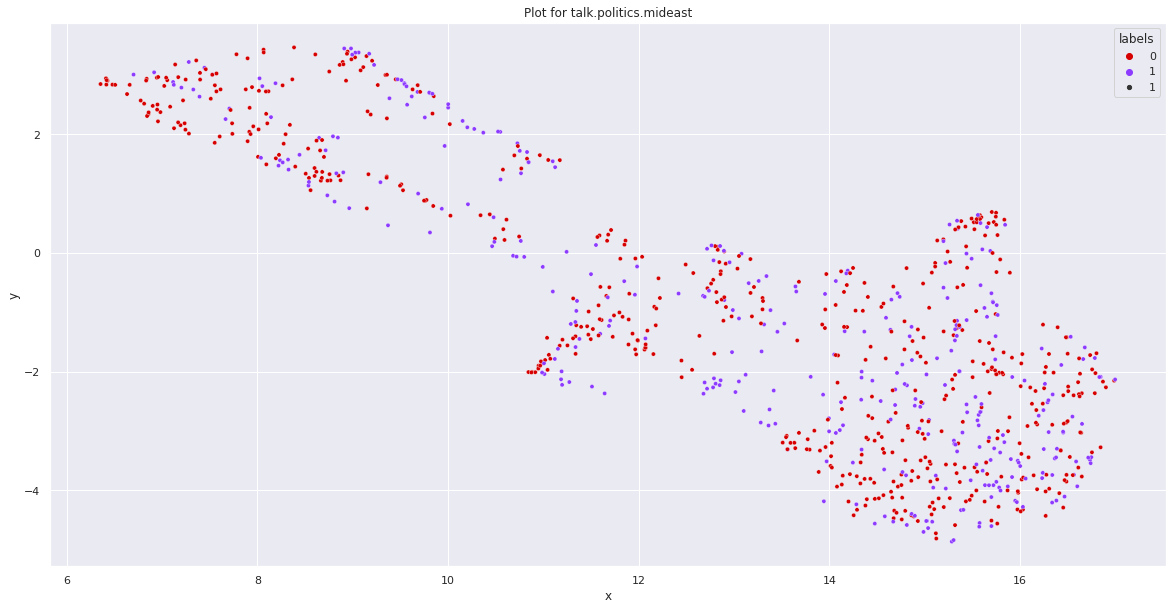

Cluster Number: sci.med
956


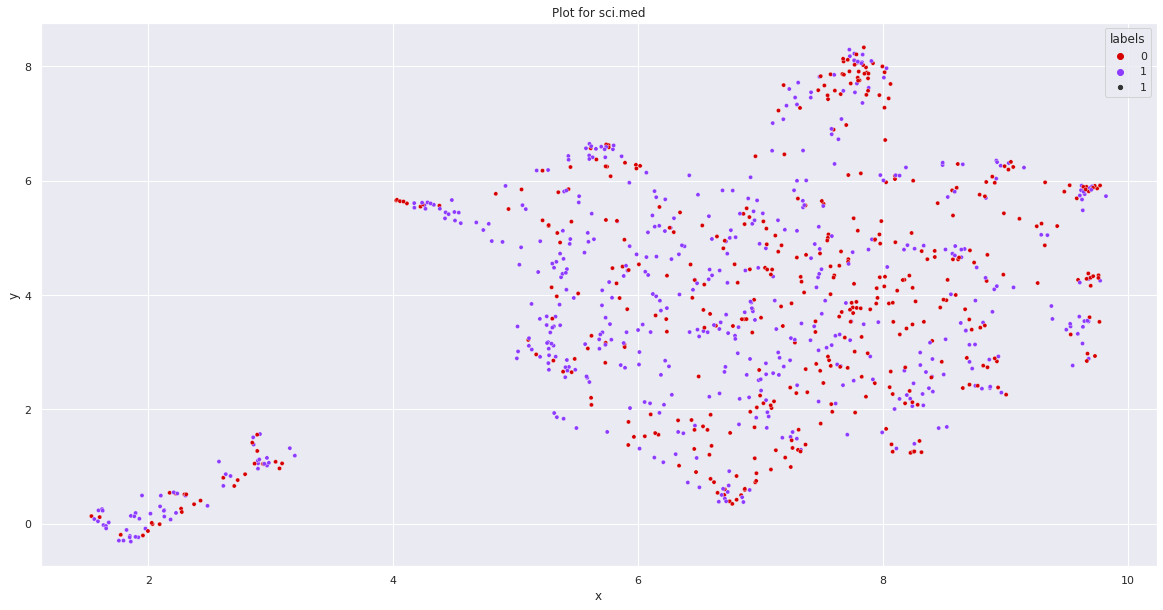

Cluster Number: talk.religion.misc
601


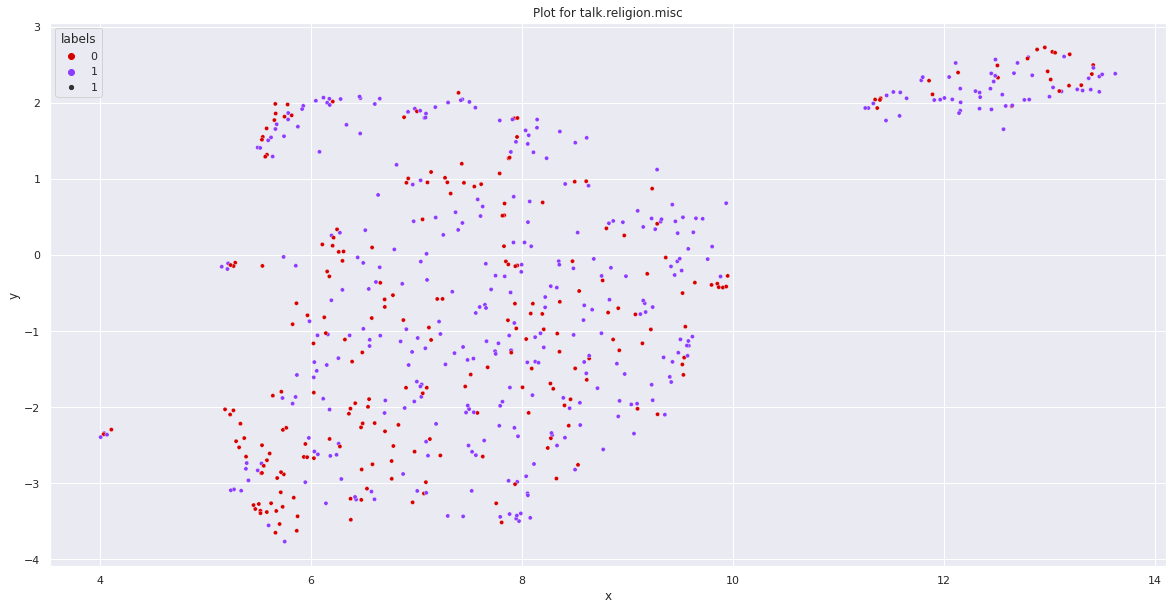

Cluster Number: comp.graphics
952


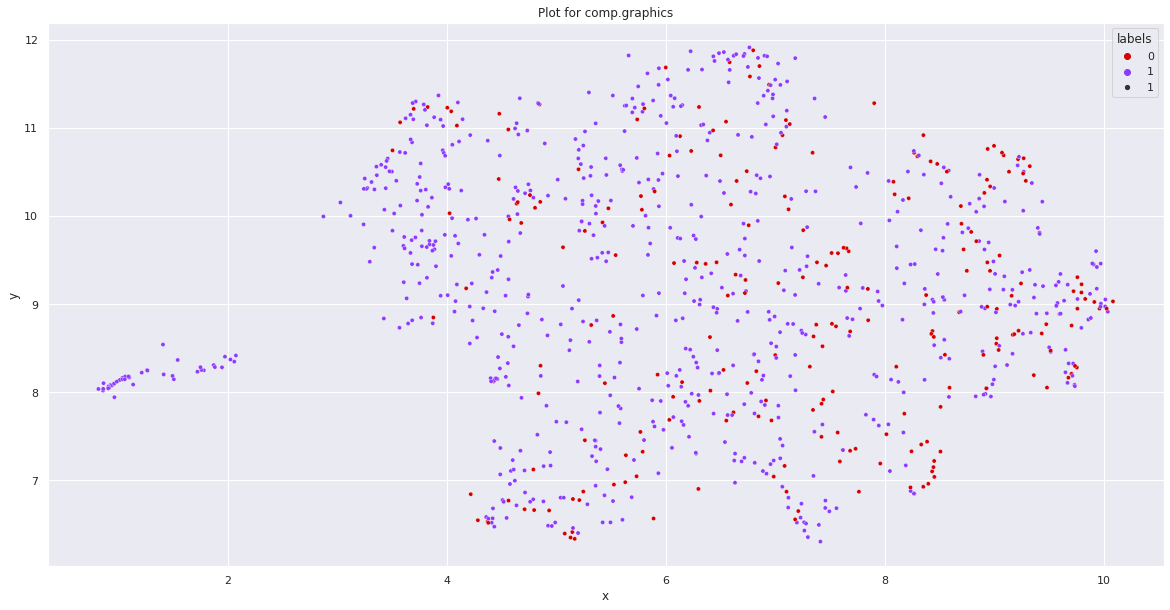

Cluster Number: sci.crypt
961


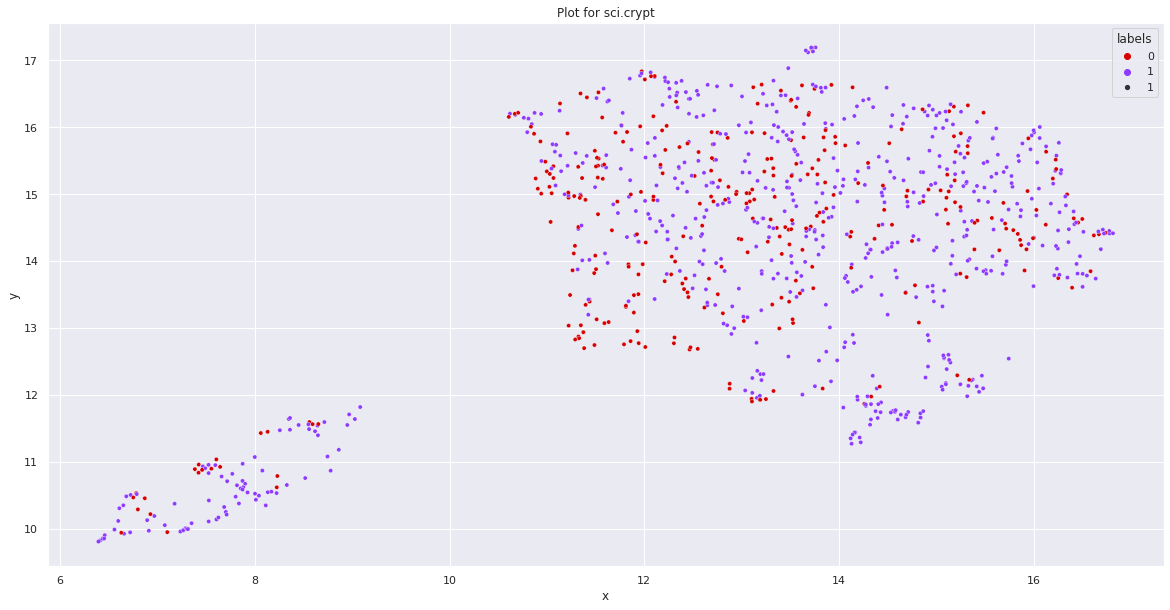

Cluster Number: comp.windows.x
975


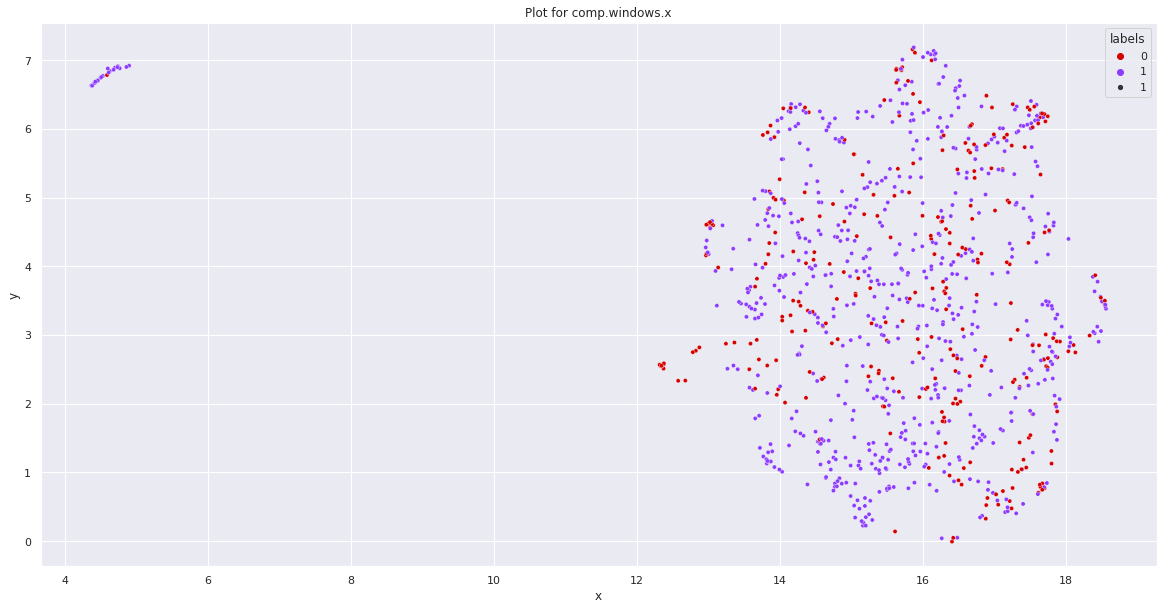

Cluster Number: talk.politics.guns
885


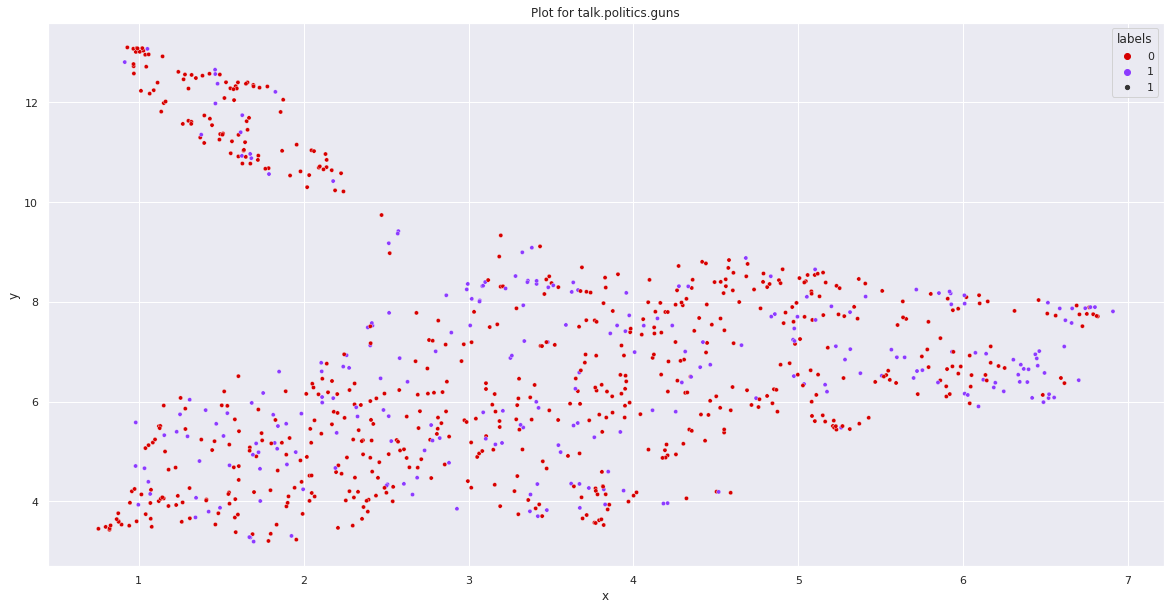

Cluster Number: sci.electronics
955


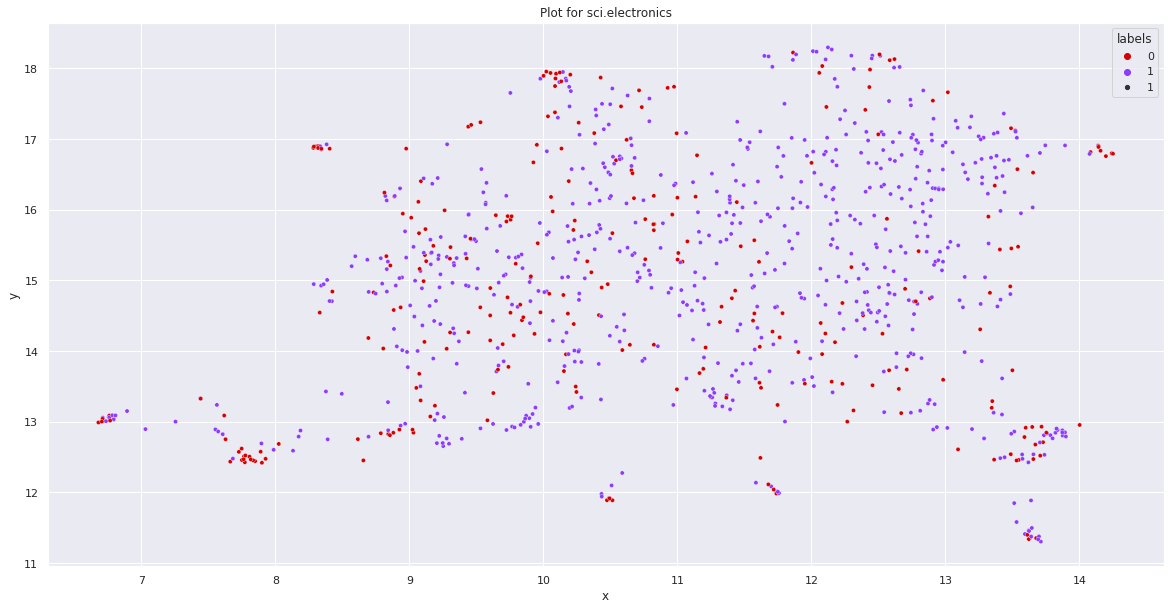

Cluster Number: comp.sys.mac.hardware
927


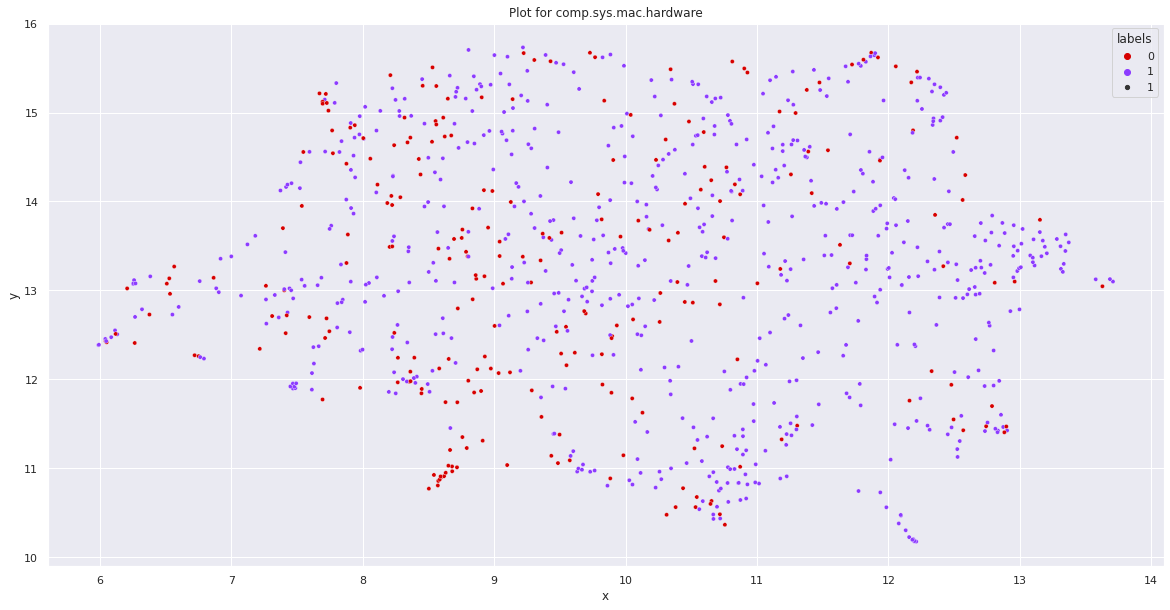

In [35]:
plot_number = 1

for clust_number in set(df["label"].values):
  print("Cluster Number:", clust_number)
  # Prepare data
  data = X_new[df["label"] == clust_number]
  print(len(data))
  # Prepare data
  umap_data = embedding.fit_transform(data)
  result = pd.DataFrame(umap_data, columns=['x', 'y'])
  result['labels'] = df[df["label"] == clust_number]["sentiment_vader"].values
  # Visualize clusters
  clustered = result.loc[result.labels != -1, :]
  plt.figure(figsize=(20, 10))
  plt.title(f"Plot for {clust_number}")
  sns.scatterplot(data=result, x="x", y="y", size=1, hue="labels", palette=palette)
  plt.show()
  plot_number += 1

In [37]:
plot_number = 1

for clust_number in set(df["label"].values):
  print("Cluster Number:", clust_number)
  # Prepare data
  data = X_new[df["label"] == clust_number]
  print(len(data))
  # Prepare data
  proj_3d = embedding3d.fit_transform(data)
  fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df[df['label']==clust_number].sentiment_vader, labels={'color': 'sentiment_vader'}
    )
  fig_3d.update_traces(marker_size=2)
  fig_3d.show()
  plot_number += 1

Cluster Number: sci.space
954


Cluster Number: soc.religion.christian
974


Cluster Number: rec.sport.hockey
971


Cluster Number: comp.sys.ibm.pc.hardware
962


Cluster Number: comp.os.ms-windows.misc
944


Cluster Number: alt.atheism
777


Cluster Number: rec.motorcycles
968


Cluster Number: rec.sport.baseball
949


Cluster Number: rec.autos
934


Cluster Number: misc.forsale
959


Cluster Number: talk.politics.misc
751


Cluster Number: talk.politics.mideast
915


Cluster Number: sci.med
956


Cluster Number: talk.religion.misc
601


Cluster Number: comp.graphics
952


Cluster Number: sci.crypt
961


Cluster Number: comp.windows.x
975


Cluster Number: talk.politics.guns
885


Cluster Number: sci.electronics
955


Cluster Number: comp.sys.mac.hardware
927
